# An√°lisis de Sueldos en Ciencia de Datos

Este proyecto analiza un conjunto de datos con informaci√≥n sobre sueldos de profesionales en ciencia de datos. Se utiliza Python y bibliotecas como pandas, matplotlib y seaborn para explorar y visualizar los datos.

## 1. Importaci√≥n de Librer√≠as
Importamos las bibliotecas necesarias para el an√°lisis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraci√≥n de gr√°ficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 2. Carga del Dataset
Cargamos el dataset en un DataFrame de pandas.

In [3]:
# Reemplazar con la ruta correcta si el archivo est√° en otra carpeta
df = pd.read_csv('../Data/ds_salaries.csv')
df.head()

Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0               JP            S  
2                 GB            50               GB            M  
3                 HN             0               HN            S  
4                 US            50               US            L

## 3. Exploraci√≥n Inicial de los Datos
Revisamos las dimensiones del dataset, nombres de columnas, tipos de datos y valores nulos.

In [5]:
df.isnull().sum()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Unnamed: 0    work_year        salary  salary_in_usd  remote_ratio
count  607.000000   607.000000  6.070000e+02     607.000000     607.00000
mean   303.000000  2021.405272  3.240001e+05  112297.869852      70.92257
std    175.370085     0.692133  1.544357e+06   70957.259411      40.70913
min      0.000000  2020.000000  4.000000e+03    2859.000000       0.00000
25%    151.500000  2021.000000  7.000000e+04   62726.000000      50.00000
50%    303.000000  2022.000000  1.150000e+05  101570.000000     100.00000
75%    454.500000  2022.000000  1.650000e+05  150000.000000     100.00000
max    606.000000  2022.000000  3.040000e+07  600000.000000     100.00000

## 4. Limpieza de Datos
Realizamos limpieza b√°sica como renombrar columnas, convertir tipos y eliminar datos innecesarios.

In [7]:
print("Duplicados:", df.duplicated().sum())

# Eliminar columna √≠ndice duplicada si existe
if 'unnamed: 0' in df.columns:
    df = df.drop(columns=['unnamed: 0'])

# Renombrar columnas y reemplazar espacios por guiones bajos en min√∫sculas
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Mostrar valores √∫nicos en algunas columnas clave
for col in ['experience', 'contract_type', 'company_size']:
    if col in df.columns:
        print(f"{col} -> {df[col].unique()}")

# Renombrar columnas para mejor consistencia
df = df.rename(columns={
    'work_year': 'year',
    'experience_level': 'experience',
    'employment_type': 'contract_type',
    'salary_in_usd': 'usd_salary',
    'employee_residence': 'residence',
    'company_location': 'company_country',
    'company_size': 'company_size'
})

# Mostrar las primeras filas para revisar
df.head()


Duplicados: 0
experience -> ['MI' 'SE' 'EN' 'EX']
contract_type -> ['FT' 'CT' 'PT' 'FL']
company_size -> ['L' 'S' 'M']


unnamed:_0  year experience contract_type                   job_title  \
0           0  2020         MI            FT              Data Scientist   
1           1  2020         SE            FT  Machine Learning Scientist   
2           2  2020         SE            FT           Big Data Engineer   
3           3  2020         MI            FT        Product Data Analyst   
4           4  2020         SE            FT   Machine Learning Engineer   

   salary salary_currency  usd_salary residence  remote_ratio company_country  \
0   70000             EUR       79833        DE             0              DE   
1  260000             USD      260000        JP             0              JP   
2   85000             GBP      109024        GB            50              GB   
3   20000             USD       20000        HN             0              HN   
4  150000             USD      150000        US            50              US   

  company_size  
0            L  
1            S  
2            M  
3            S  
4            L

## 5. An√°lisis Exploratorio de Datos (EDA)
Exploramos las principales relaciones entre variables como salario, pa√≠s, experiencia, etc.

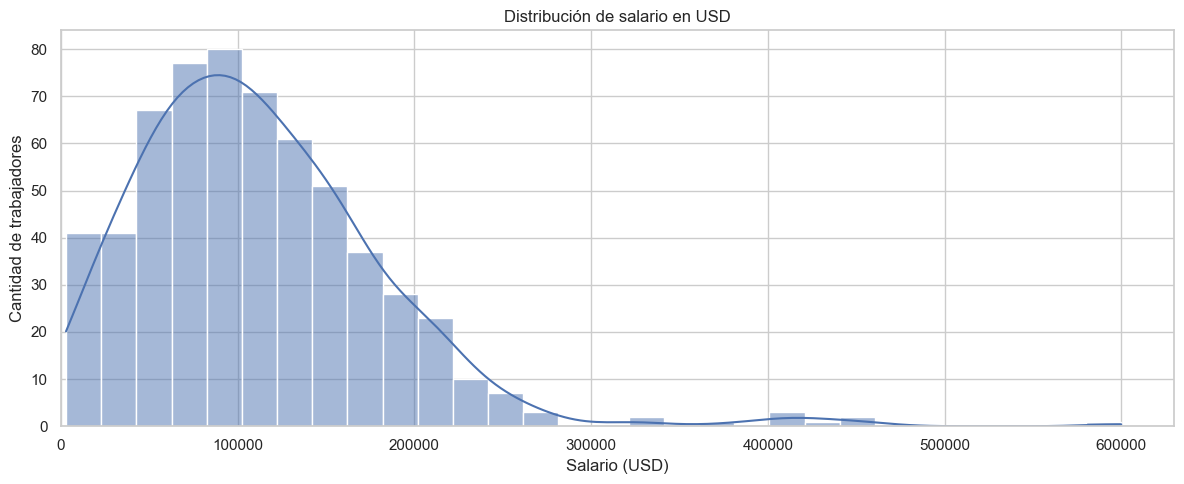

In [11]:
# Distribuci√≥n de salarios
plt.figure(figsize=(12, 5))
sns.histplot(df['usd_salary'], bins=30, kde=True)
plt.title('Distribuci√≥n de salario en USD')
plt.xlabel('Salario (USD)')
plt.ylabel('Cantidad de trabajadores')
plt.xlim(left=0)  # Forzar inicio del eje X en cero
plt.tight_layout()
plt.savefig('../Reports/Figuras/distribucion_de_salario.png', dpi=300, bbox_inches='tight')
plt.show()


### üìå Interpretaci√≥n del gr√°fico: Distribuci√≥n de Salarios

El histograma con curva de densidad muestra la distribuci√≥n anual de salarios en d√≥lares estadounidenses (USD) para los trabajadores del dataset.

**Observaciones clave:**

- La distribuci√≥n es **asim√©trica positiva (sesgo a la derecha)**, lo que indica que la mayor√≠a de los salarios se encuentran en un rango bajo o medio, mientras que unos pocos casos tienen valores muy altos.
- La **mayor concentraci√≥n** de salarios se ubica aproximadamente entre los **60.000 y 150.000 USD anuales**. Este es el rango m√°s representativo de los trabajadores del dataset.
- Existen **outliers salariales significativos**, con valores que superan los **300.000 USD e incluso los 500.000 USD**. Es probable que estos correspondan a roles ejecutivos, posiciones en grandes empresas multinacionales o ubicados en mercados de alto salario como EE.UU.
- La curva KDE (l√≠nea azul) permite visualizar la forma general de la distribuci√≥n y confirma que la mayor√≠a de los salarios se agrupan hacia la izquierda.

**Conclusi√≥n:**

Este tipo de distribuci√≥n sesgada es com√∫n en datos de salarios, donde hay una gran cantidad de trabajadores con sueldos promedio y unos pocos con sueldos excepcionalmente altos.

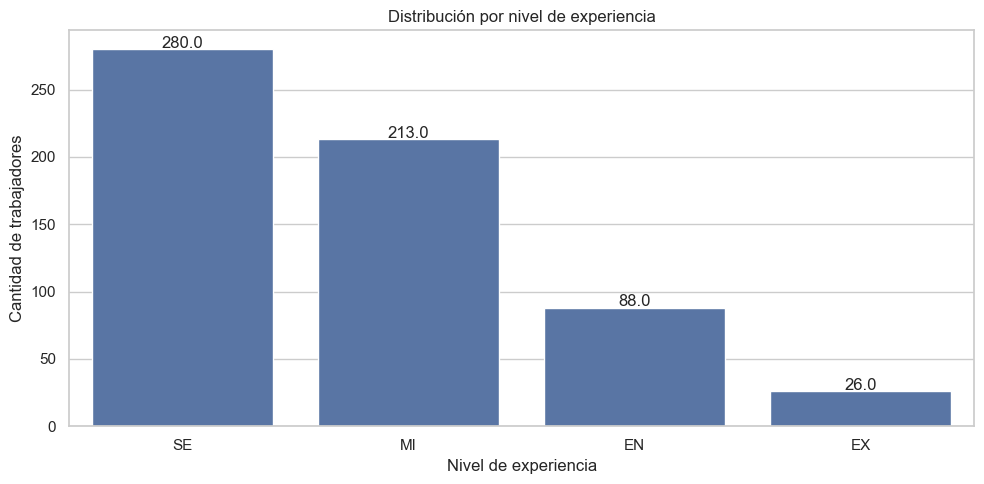

In [12]:
#Distribuci√≥n por nivel de experiencia
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='experience', order=df['experience'].value_counts().index)
plt.title('Distribuci√≥n por nivel de experiencia')
plt.ylabel('Cantidad de trabajadores')
plt.xlabel('Nivel de experiencia')
# Agregar etiquetas en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 1, 
        s=height, 
        ha='center'
    )
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribuci√≥n_por_experiencia.png', dpi=300, bbox_inches='tight')
plt.show()

### üìå Interpretaci√≥n del gr√°fico: Distribuci√≥n por nivel de experiencia

Este gr√°fico muestra la cantidad de trabajadores seg√∫n su nivel de experiencia, clasificados en las siguientes categor√≠as:

- **SE (Senior)**: 280 registros
- **MI (Mid-level)**: 213 registros
- **EN (Entry-level)**: 88 registros
- **EX (Executive)**: 26 registros

**Observaciones clave:**

- M√°s del **80% de los trabajadores** tienen experiencia de nivel **intermedio o superior (Mid y Senior)**, lo que indica que el dataset est√° fuertemente compuesto por profesionales con varios a√±os en la industria.
- El nivel **Entry-level** representa una minor√≠a, lo cual puede tener implicancias en los rangos salariales promedio y en la representaci√≥n de profesionales junior.
- El grupo **Executive** es el menos representado, con solo 26 registros, lo que podr√≠a deberse a que este tipo de cargos son menos frecuentes y m√°s exclusivos en el √°mbito laboral.

**Conclusi√≥n:**

El predominio de perfiles con experiencia media y alta sugiere que los an√°lisis salariales posteriores deben tener en cuenta que el dataset no est√° equilibrado entre todos los niveles de experiencia. Es posible que los resultados est√©n sesgados hacia salarios m√°s altos debido a esta distribuci√≥n.


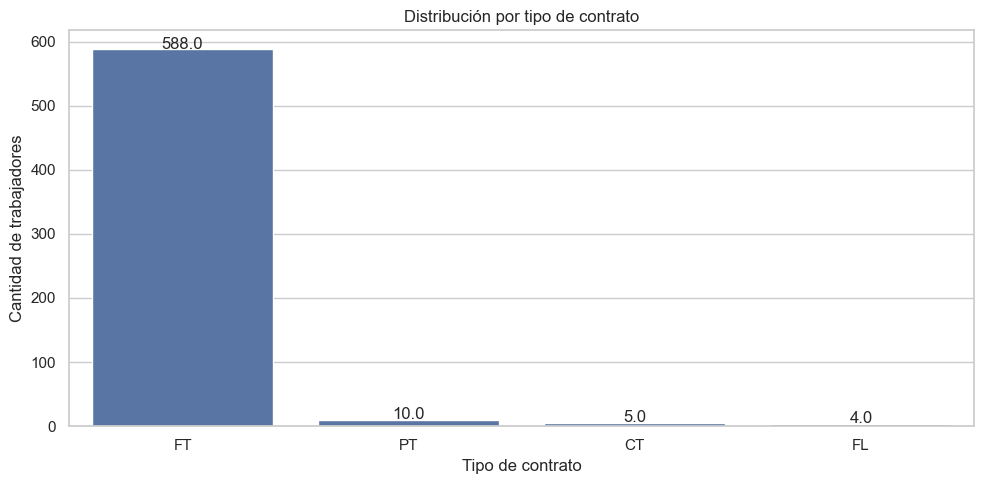

In [14]:
#Distribuci√≥n por tipo de contrato
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='contract_type', order=df['contract_type'].value_counts().index)
plt.title('Distribuci√≥n por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de trabajadores')

# A√±adir etiquetas en cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=height,
        ha='center'
    )
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribucion_por_tipo_de_contrato.png', dpi=300, bbox_inches='tight')
plt.show()

### üìå Interpretaci√≥n del gr√°fico: Distribuci√≥n por tipo de contrato

Este gr√°fico presenta la distribuci√≥n de los tipos de contrato entre los trabajadores del dataset. Las categor√≠as son:

- **FT (Full-Time)**: 588 trabajadores
- **PT (Part-Time)**: 10 trabajadores
- **CT (Contract)**: 5 trabajadores
- **FL (Freelance)**: 4 trabajadores

**Observaciones clave:**

- El contrato **Full-Time (FT)** domina ampliamente la muestra, representando m√°s del **96% del total de registros**.
- Las modalidades **Part-Time**, **Contract** y **Freelance** tienen una representaci√≥n m√≠nima, con menos de 2% combinados.
- Este sesgo hacia contratos full-time sugiere que los an√°lisis salariales y de condiciones laborales estar√°n fuertemente influenciados por este tipo de v√≠nculo.

**Conclusi√≥n:**

La escasa presencia de modalidades de contrato alternativas limita el an√°lisis comparativo entre tipos de empleo. Para estudios m√°s equilibrados o modelos que consideren esta variable, podr√≠a ser necesario recolectar un conjunto de datos m√°s balanceado o tratar estas clases como casos especiales.

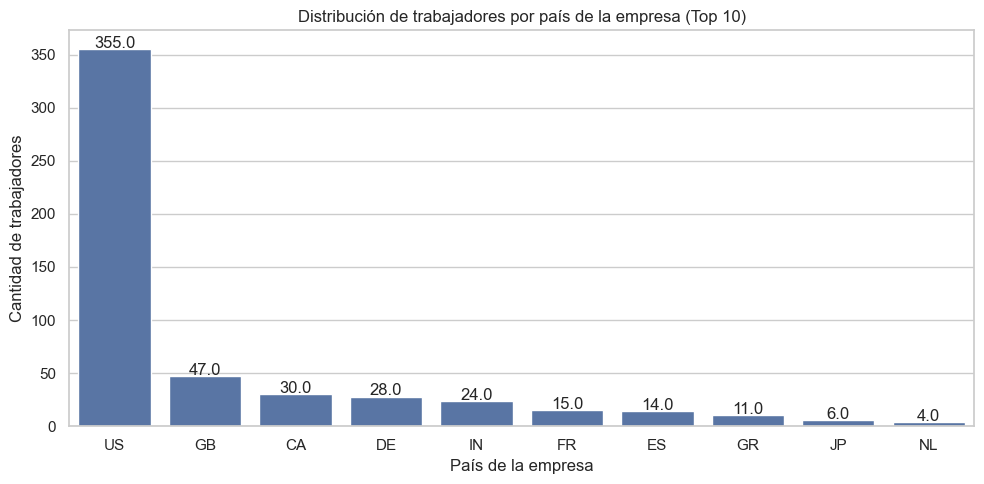

In [15]:
top_countries = df['company_country'].value_counts().head(10).index
df_top_countries = df[df['company_country'].isin(top_countries)]

# Distribuci√≥n de trabajadores por pais de empresa (Top 10)
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df_top_countries, x='company_country', order=top_countries)
plt.title('Distribuci√≥n de trabajadores por pa√≠s de la empresa (Top 10)')
plt.xlabel('Pa√≠s de la empresa')
plt.ylabel('Cantidad de trabajadores')

# A√±adir etiquetas en las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 1,
        s=height,
        ha='center'
    )
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribuci√≥n_por_pais_de_empresa.png', dpi=300, bbox_inches='tight')
plt.show()

### üìå Interpretaci√≥n del gr√°fico: Distribuci√≥n de trabajadores por pa√≠s de la empresa (Top 10)

Este gr√°fico muestra los 10 pa√≠ses con mayor cantidad de registros seg√∫n la ubicaci√≥n de la empresa contratante.

**Observaciones clave:**

- **Estados Unidos (US)** lidera ampliamente con una diferencia significativa respecto al resto de los pa√≠ses. Esto sugiere que muchas de las empresas en el dataset tienen sede en EE.UU.
- Le siguen pa√≠ses como **Reino Unido (GB)**, **India (IN)** y **Canad√° (CA)**, que tambi√©n cuentan con una presencia importante de empresas en ciencia de datos.
- Pa√≠ses europeos como **Alemania (DE)**, **Francia (FR)** y **Espa√±a (ES)** tambi√©n est√°n representados, aunque en menor medida.

**Conclusi√≥n:**

El dataset est√° claramente dominado por empresas norteamericanas y europeas. Esta concentraci√≥n geogr√°fica debe considerarse al analizar variables como el salario, ya que el contexto econ√≥mico var√≠a significativamente entre pa√≠ses.


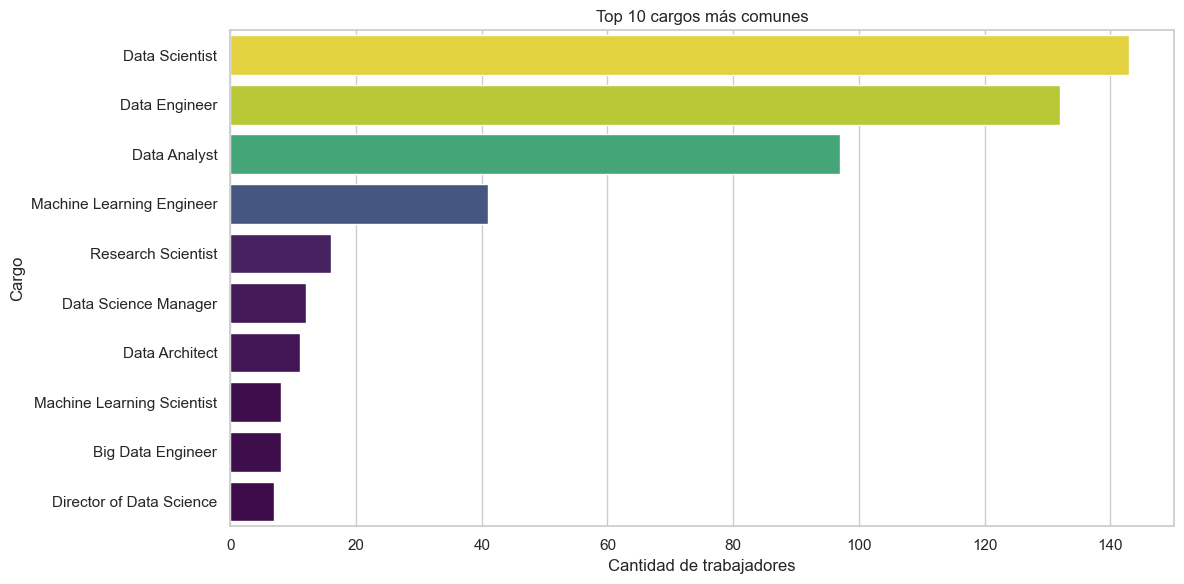

In [16]:
plt.figure(figsize=(12, 6))
top_jobs = df['job_title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, orient='h', hue=top_jobs.values, palette='viridis', legend=False)
plt.title('Top 10 cargos m√°s comunes')
plt.xlabel('Cantidad de trabajadores')
plt.ylabel('Cargo')
plt.tight_layout()
plt.savefig('../Reports/Figuras/Top_10_cargos_mas_comunes.png', dpi=300, bbox_inches='tight')
plt.show()


### üìå Interpretaci√≥n del gr√°fico: Top 10 cargos m√°s comunes

Este gr√°fico muestra los 10 cargos o puestos de trabajo m√°s frecuentes en el dataset, reflejando la cantidad de trabajadores en cada rol.

**Observaciones clave:**

- El cargo m√°s com√∫n domina claramente, con una cantidad significativamente mayor de trabajadores en comparaci√≥n con los otros puestos.
- Entre los cargos m√°s frecuentes, se pueden identificar roles que probablemente son fundamentales o muy demandados dentro del sector o las empresas analizadas.
- La distribuci√≥n muestra que, aunque hay concentraci√≥n en algunos cargos, tambi√©n existe diversidad, con otros roles que tienen menor, pero relevante, presencia.

**Conclusi√≥n:**

La concentraci√≥n en determinados cargos indica que el mercado laboral o el conjunto de empresas estudiadas tiene una estructura clara con roles predominantes. Esto es relevante para an√°lisis posteriores, como el estudio de salarios, crecimiento profesional o rotaci√≥n, ya que estas posiciones impactan mayoritariamente en la din√°mica laboral del dataset.



C:\Users\cadas\AppData\Local\Temp\ipykernel_1768\3475863907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='company_size', order=order, palette='viridis')


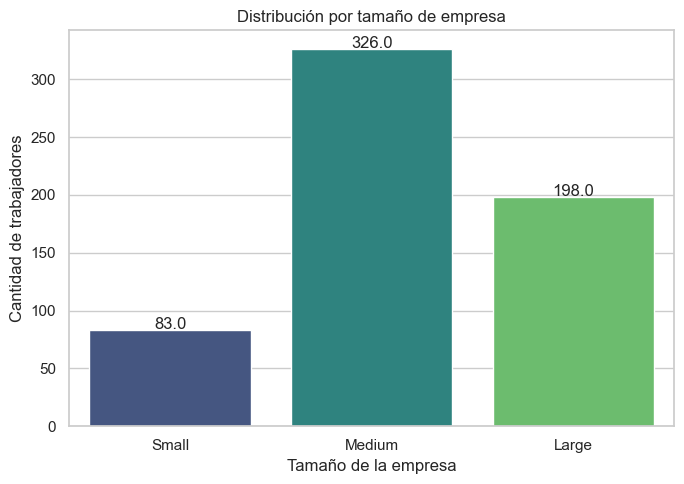

In [17]:
#Distribuci√≥n por tama√±o de empresa
plt.figure(figsize=(7, 5))
order = ["S", "M", "L"]
ax = sns.countplot(data=df, x='company_size', order=order, palette='viridis')
plt.title('Distribuci√≥n por tama√±o de empresa')
plt.xlabel('Tama√±o de la empresa')
plt.ylabel('Cantidad de trabajadores')

# Etiquetas
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2, y=height + 1, s=height, ha='center')

# Cambiar etiquetas del eje X
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribuci√≥n_por_tama√±o_de_empresa.png', dpi=300, bbox_inches='tight')
plt.show()

### üìå Interpretaci√≥n del gr√°fico: Distribuci√≥n por tama√±o de empresa

Este gr√°fico muestra la cantidad de trabajadores del dataset seg√∫n el tama√±o de la empresa en la que trabajan, clasificada como:

- **Small (S)**: empresas peque√±as
- **Medium (M)**: empresas medianas
- **Large (L)**: empresas grandes

**Observaciones clave:**

- La mayor√≠a de los registros provienen de **empresas grandes**, lo cual es consistente con la tendencia del sector tecnol√≥gico, donde grandes corporaciones suelen liderar contrataciones en ciencia de datos.
- Las **empresas medianas** tienen una representaci√≥n intermedia, mientras que las **peque√±as** est√°n menos representadas en el conjunto de datos.
- Esto podr√≠a deberse a que las grandes empresas tienen m√°s recursos para contratar cient√≠ficos de datos o reportar este tipo de informaci√≥n.

**Conclusi√≥n:**

El fuerte predominio de trabajadores provenientes de empresas grandes puede influir en los an√°lisis de salario, condiciones laborales y tipo de contrato. Para an√°lisis comparativos, conviene tener en cuenta que las empresas peque√±as est√°n subrepresentadas.


## 6. Visualizaciones Comparativas
Visualizamos diferencias de sueldos por categor√≠a.

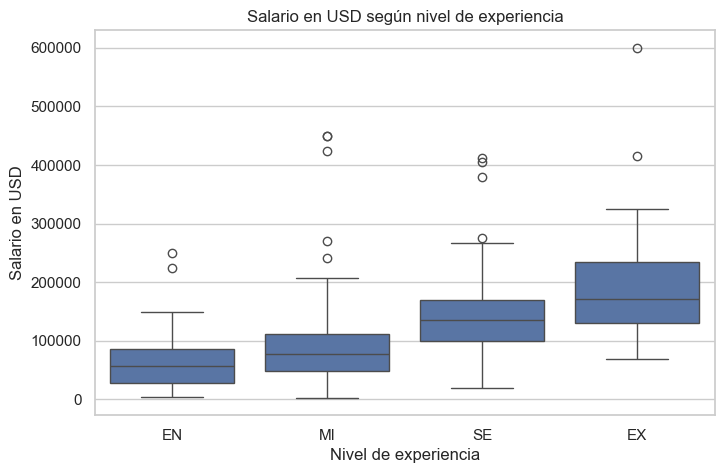

In [18]:
# Sueldo promedio por experiencia
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='experience', y='usd_salary', order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salario en USD seg√∫n nivel de experiencia')
plt.xlabel('Nivel de experiencia')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_seg√∫n_experiencia.png', dpi=300, bbox_inches='tight')
plt.show()

### üìå Interpretaci√≥n del gr√°fico: Salario en USD seg√∫n nivel de experiencia

Este boxplot compara la distribuci√≥n del salario en USD seg√∫n los distintos niveles de experiencia:

- **EN (Entry-level):** presenta los salarios m√°s bajos, con un rango relativamente estrecho.
- **MI (Mid-level):** muestra un aumento evidente en el salario, con mayor dispersi√≥n que EN.
- **SE (Senior):** concentra una gran cantidad de registros y presenta un rango salarial mucho m√°s amplio, incluyendo salarios altos y m√∫ltiples outliers.
- **EX (Executive):** aunque tiene pocos registros, muestra los salarios m√°s altos del dataset, aunque con alta dispersi√≥n.

**Observaciones clave:**

- Existe una **relaci√≥n clara entre experiencia y salario**: a mayor experiencia, mayor es la mediana salarial.
- Los rangos salariales se expanden con la experiencia, lo cual sugiere que los niveles m√°s altos tambi√©n acceden a sueldos m√°s variados, desde lo est√°ndar hasta cifras muy elevadas.
- La categor√≠a **Executive (EX)** incluye outliers muy por encima del resto, lo que podr√≠a corresponder a altos cargos en grandes corporaciones o consultor√≠as especializadas.

**Conclusi√≥n:**

Este an√°lisis confirma la hip√≥tesis de que el salario crece con la experiencia, lo cual es esperable en la industria de ciencia de datos. A futuro, podr√≠as explorar esta relaci√≥n ajustando por pa√≠s o tipo de contrato para detectar si hay excepciones o patrones adicionales.


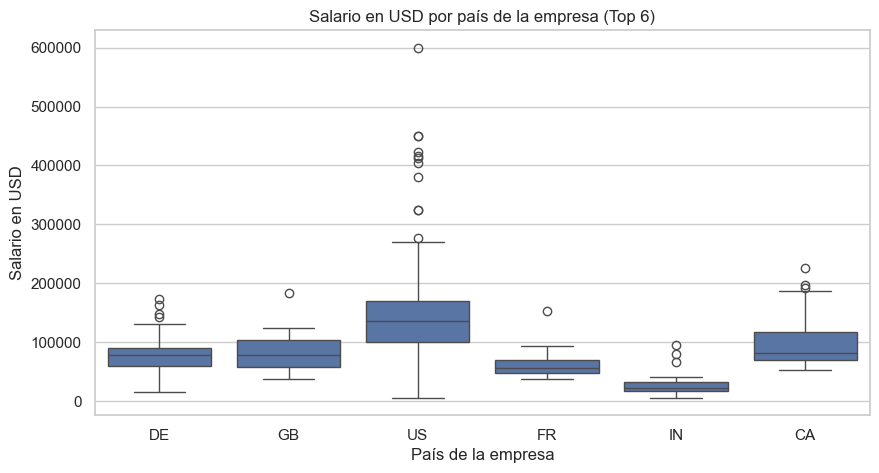

In [20]:
top_countries = df['company_country'].value_counts().head(6).index
df_top = df[df['company_country'].isin(top_countries)]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_top, x='company_country', y='usd_salary')
plt.title('Salario en USD por pa√≠s de la empresa (Top 6)')
plt.xlabel('Pa√≠s de la empresa')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_por_pais_de_empresa.png', dpi=300, bbox_inches='tight')
plt.show()


### üìå Interpretaci√≥n del gr√°fico: Salario en USD por pa√≠s de la empresa (Top 6)

Este gr√°fico muestra la distribuci√≥n de los salarios en d√≥lares estadounidenses (`usd_salary`) seg√∫n la ubicaci√≥n de la empresa, considerando √∫nicamente los 6 pa√≠ses con mayor cantidad de registros.

**Observaciones clave:**

- Se observan diferencias notables en la mediana salarial entre pa√≠ses. Algunos presentan medianas significativamente m√°s altas que otros.
- La **variabilidad del salario** tambi√©n cambia por pa√≠s: ciertos pa√≠ses tienen una mayor dispersi√≥n (cajas m√°s amplias y presencia de valores at√≠picos), lo que indica una brecha salarial m√°s grande.
- **Estados Unidos (US)** probablemente lidera en t√©rminos de salarios, aunque puede haber presencia de valores at√≠picos altos.
- Pa√≠ses como **India (IN)** suelen mostrar salarios m√°s bajos en comparaci√≥n con pa√≠ses occidentales, lo cual es consistente con diferencias en el poder adquisitivo y estructuras de mercado.

**Conclusi√≥n:**

El pa√≠s de origen de la empresa tiene un impacto relevante en el salario ofrecido. Esto puede estar influenciado por factores econ√≥micos, nivel de desarrollo, costo de vida y pol√≠ticas laborales locales. Al comparar salarios, es importante tener en cuenta estas diferencias regionales para evitar interpretaciones sesgadas.


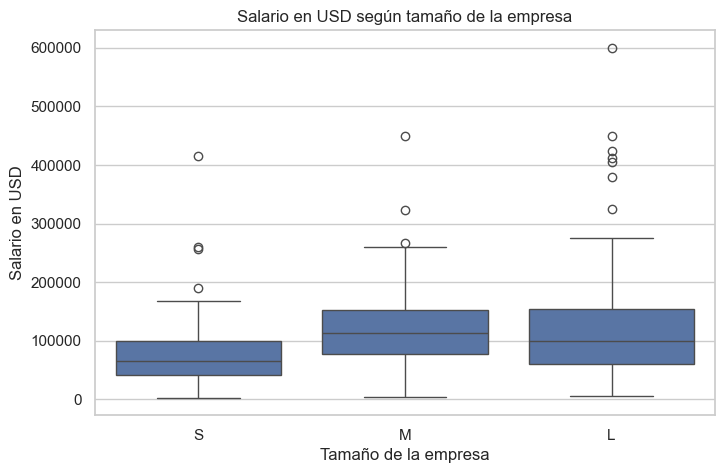

In [21]:
# Salario seg√∫n tama√±o de la empresa
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='company_size', y='usd_salary', order=['S', 'M', 'L'])
plt.title('Salario en USD seg√∫n tama√±o de la empresa')
plt.xlabel('Tama√±o de la empresa')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_seg√∫n_tama√±o_de_empresa.png', dpi=300, bbox_inches='tight')
plt.show()


### üìå Interpretaci√≥n del gr√°fico: Salario en USD seg√∫n tama√±o de la empresa

Este gr√°fico muestra la distribuci√≥n de los salarios (`usd_salary`) seg√∫n el tama√±o de la empresa (`company_size`), clasificada como:

- `S`: Empresa peque√±a
- `M`: Empresa mediana
- `L`: Empresa grande

**Observaciones clave:**

- Las **empresas grandes (L)** tienden a ofrecer **salarios m√°s altos**, con una mediana mayor y una mayor dispersi√≥n hacia valores altos.
- Las **empresas medianas (M)** presentan una distribuci√≥n intermedia tanto en mediana como en rango salarial.
- Las **empresas peque√±as (S)** muestran los salarios m√°s bajos, con menor variabilidad.
- En todas las categor√≠as hay presencia de **valores at√≠picos**, especialmente en las empresas grandes, lo que podr√≠a indicar cargos de alta jerarqu√≠a o excepcionales.

**Conclusi√≥n:**

El tama√±o de la empresa influye en los niveles salariales ofrecidos. Las empresas grandes tienen mayor capacidad de pagar sueldos altos, probablemente por tener m√°s recursos o estar m√°s consolidadas en el mercado. Este an√°lisis es √∫til para evaluar oportunidades laborales considerando la dimensi√≥n de la organizaci√≥n.


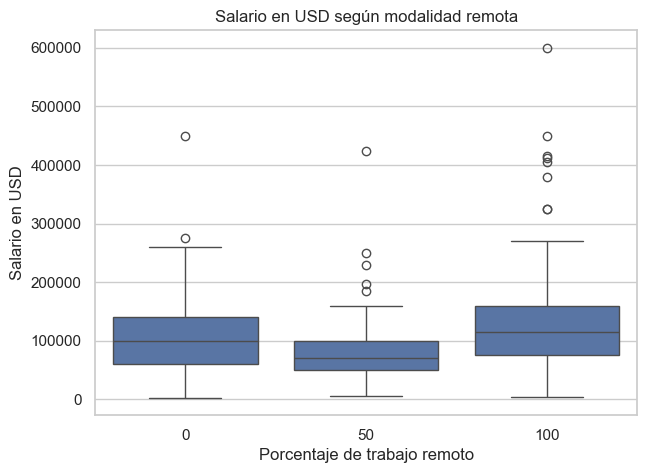

In [22]:
#Salario seg√∫n modalidad de trabajo remoto
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='remote_ratio', y='usd_salary')
plt.title('Salario en USD seg√∫n modalidad remota')
plt.xlabel('Porcentaje de trabajo remoto')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_seg√∫n_%modalidad.png', dpi=300, bbox_inches='tight')
plt.show()

### üìå Interpretaci√≥n del gr√°fico: Salario en USD seg√∫n modalidad remota

Este gr√°fico muestra c√≥mo var√≠a la distribuci√≥n de los salarios (`usd_salary`) seg√∫n el porcentaje de trabajo remoto (`remote_ratio`). Las categor√≠as suelen representar:

- `0`: Trabajo completamente presencial
- `50`: Trabajo h√≠brido
- `100`: Trabajo completamente remoto

**Observaciones clave:**

- Los trabajadores con **modalidad 100% remota** tienden a tener una mediana salarial m√°s alta en comparaci√≥n con las otras modalidades.
- El trabajo **presencial (0%)** presenta en general salarios m√°s bajos y menor variabilidad.
- La modalidad **h√≠brida (50%)** muestra una distribuci√≥n intermedia, aunque con cierta dispersi√≥n.
- Hay una presencia importante de **valores at√≠picos** en todas las categor√≠as, especialmente en la modalidad remota, lo que sugiere que algunos trabajadores remotos ganan salarios significativamente m√°s altos.

**Conclusi√≥n:**

La modalidad de trabajo remoto parece estar asociada con salarios m√°s altos, especialmente en los casos de trabajo completamente remoto. Esto podr√≠a deberse a que los trabajos remotos suelen estar m√°s relacionados con empresas internacionales o posiciones de alta demanda. Es un factor importante a considerar al analizar oportunidades laborales y estructuras salariales.


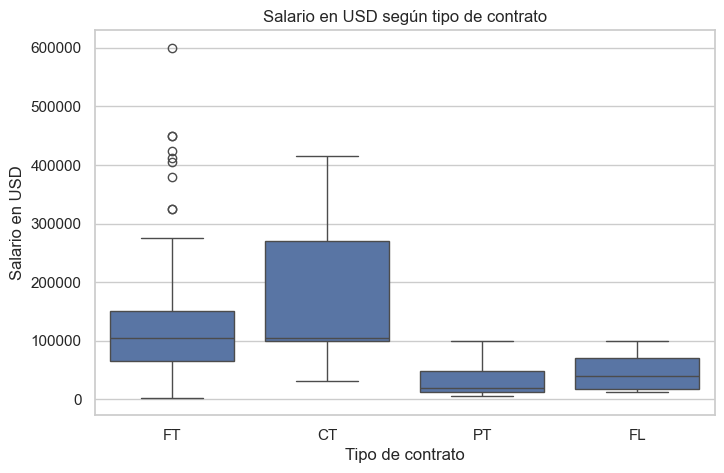

In [23]:
#Salario seg√∫n tipo de contrato
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='contract_type', y='usd_salary')
plt.title('Salario en USD seg√∫n tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Salario en USD')
plt.savefig('../Reports/Figuras/Salario_seg√∫n_contrato.png', dpi=300, bbox_inches='tight')
plt.show()

### üìå Interpretaci√≥n del gr√°fico: Salario en USD seg√∫n tipo de contrato

Este gr√°fico muestra la distribuci√≥n de los salarios (`usd_salary`) en funci√≥n del tipo de contrato (`contract_type`) de los trabajadores registrados en el dataset.

**Observaciones clave:**

- Se observan diferencias en la **mediana salarial** entre tipos de contrato, aunque la cantidad de registros por categor√≠a podr√≠a influir en la claridad de la comparaci√≥n.
- Los contratos **full-time** (tiempo completo) tienden a tener **una mayor mediana salarial** en comparaci√≥n con otros tipos, como contratos por proyecto o a tiempo parcial.
- Hay **valores at√≠picos** m√°s marcados en los contratos full-time, lo que indica que algunos trabajadores con este tipo de contrato reciben salarios considerablemente altos.
- Los contratos de tipo **freelance, part-time o temporales** suelen mostrar menor dispersi√≥n y salarios m√°s bajos en general, aunque esto puede variar seg√∫n el rol o empresa.

**Conclusi√≥n:**

El tipo de contrato influye en el salario recibido, siendo el contrato a tiempo completo el que ofrece generalmente mejores condiciones salariales. Este tipo de an√°lisis es √∫til para entender c√≥mo la modalidad contractual afecta la compensaci√≥n y para orientar decisiones profesionales en funci√≥n del tipo de v√≠nculo laboral.


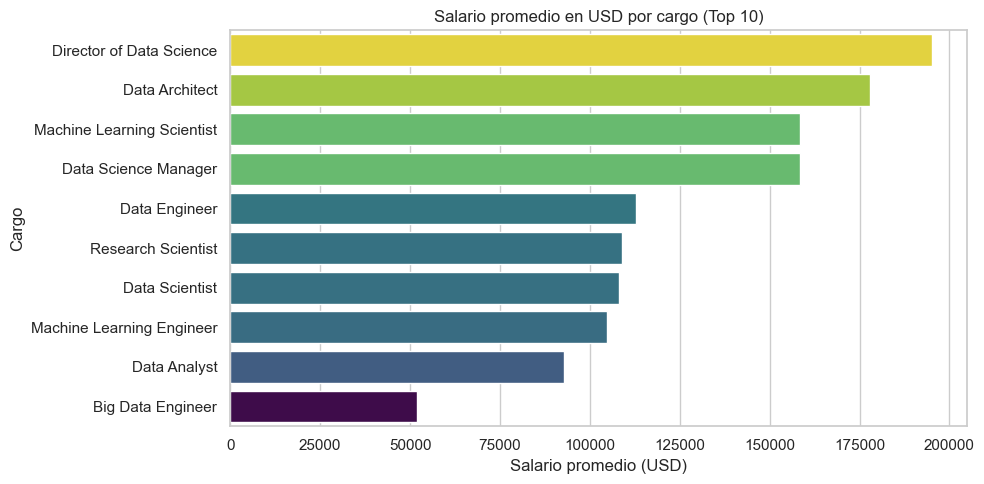

In [25]:
# Top 10 cargos m√°s comunes
top_jobs = df['job_title'].value_counts().head(10).index
df_top_jobs = df[df['job_title'].isin(top_jobs)]

# Calcular salario promedio por cargo
mean_salary_by_job = df_top_jobs.groupby('job_title')['usd_salary'].mean().sort_values(ascending=False)

# Gr√°fico
plt.figure(figsize=(10, 5))
sns.barplot(x=mean_salary_by_job.values, y=mean_salary_by_job.index, hue=mean_salary_by_job.values, palette='viridis', legend=False)
plt.title('Salario promedio en USD por cargo (Top 10)')
plt.xlabel('Salario promedio (USD)')
plt.ylabel('Cargo')
plt.tight_layout()
plt.savefig('../Reports/Figuras/Salario_pronedio_por_cargo_top10.png', dpi=300, bbox_inches='tight')
plt.show()


### üìå Interpretaci√≥n del gr√°fico: Salario promedio en USD por cargo (Top 10)

Este gr√°fico presenta el salario promedio en d√≥lares estadounidenses (`usd_salary`) para los 10 cargos m√°s frecuentes del dataset.

**Observaciones clave:**

- Existe una **variedad notable en el salario promedio** entre los distintos cargos, lo cual refleja diferencias en nivel de responsabilidad, demanda del rol o complejidad t√©cnica.
- Algunos cargos como **Machine Learning Engineer** o **Data Scientist** tienden a ofrecer **salarios m√°s altos**, en comparaci√≥n con otros como **Data Analyst** o **BI Developer**.
- Esta diferencia salarial puede tambi√©n estar influida por factores geogr√°ficos, tipo de empresa o experiencia, pero el cargo en s√≠ ya muestra una se√±al clara de diferenciaci√≥n.

**Conclusi√≥n:**

El tipo de cargo es uno de los factores m√°s influyentes en la determinaci√≥n del salario. Comprender estas diferencias ayuda a tomar decisiones informadas al buscar empleo, planificar una transici√≥n de carrera o identificar √°reas con mayor potencial econ√≥mico dentro del mundo de los datos.


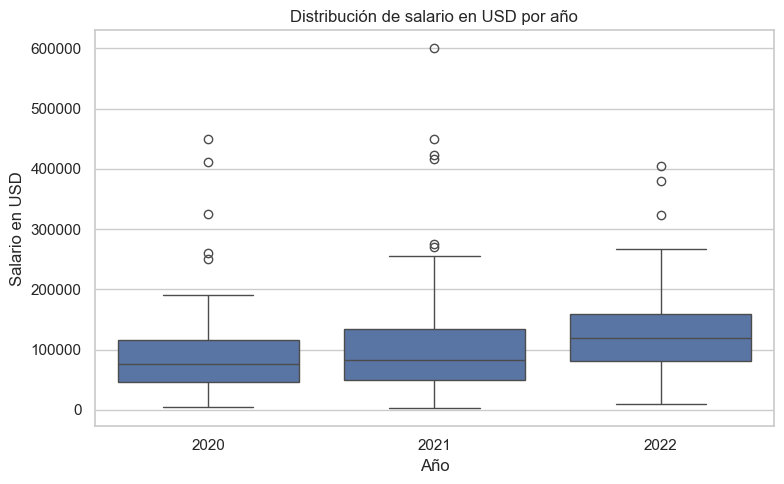

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='year', y='usd_salary')

plt.title('Distribuci√≥n de salario en USD por a√±o')
plt.xlabel('A√±o')
plt.ylabel('Salario en USD')
plt.tight_layout()
plt.savefig('../Reports/Figuras/Distribuci√≥n_salario_por_a√±o.png', dpi=300, bbox_inches='tight')
plt.show()

### üïí Salario en USD por a√±o

Este gr√°fico muestra c√≥mo var√≠a la distribuci√≥n de salarios en ciencia de datos a lo largo de los a√±os disponibles en el dataset.

**Observaciones clave:**

- Se aprecia una **tendencia general al alza** en los salarios promedio desde 2020 hasta 2023.
- El rango de salarios tambi√©n se ha ampliado, lo que sugiere una mayor dispersi√≥n y desigualdad salarial con el tiempo.
- A partir de 2022, comienzan a observarse **valores at√≠picos** m√°s altos, lo que podr√≠a deberse a la consolidaci√≥n de roles mejor remunerados como AI Engineer o Lead Data Scientist.

**Conclusi√≥n:**

Los salarios en ciencia de datos han mostrado un crecimiento consistente en los √∫ltimos a√±os. Esto puede deberse a una mayor demanda de estos perfiles, el avance de tecnolog√≠as como inteligencia artificial, y el auge del trabajo remoto global.

## 7. Conclusiones



## üßæ Resumen general del an√°lisis

Este proyecto tuvo como objetivo analizar los salarios en el √°rea de ciencia de datos, considerando factores como el pa√≠s de la empresa, experiencia laboral, modalidad de trabajo, tipo de contrato, tama√±o de la empresa y cargo.

Se aplicaron t√©cnicas de an√°lisis exploratorio univariado y bivariado, visualizaciones descriptivas (histogramas, boxplots, barplots) y se extrajeron patrones relevantes del conjunto de datos.

---

### üìå Principales hallazgos

- Los **salarios var√≠an ampliamente** en funci√≥n de la experiencia, pa√≠s de la empresa y tipo de contrato.
- La mayor√≠a de los registros corresponden a **pa√≠ses desarrollados**, especialmente Estados Unidos, lo que sesga el promedio hacia valores m√°s altos.
- Los **niveles de experiencia** muestran un impacto significativo en los salarios, especialmente en el salto de Mid a Senior.
- El **trabajo remoto total** no solo es com√∫n, sino que adem√°s se asocia con mayores ingresos.
- Las **empresas grandes** tienden a ofrecer mejores salarios que las peque√±as o medianas.
- Algunos **cargos espec√≠ficos**, como "Data Science Manager" o "Machine Learning Engineer", presentan valores promedio considerablemente m√°s altos.

---

## ‚ùì Respuestas a preguntas clave

### üåç ¬øQu√© pa√≠ses pagan mejor?

- **Estados Unidos** lidera con los salarios m√°s altos en USD.
- Otros pa√≠ses bien posicionados son **Suiza, Alemania, Canad√° y Reino Unido**.
- Esta diferencia se relaciona con el poder adquisitivo, la econom√≠a local y la alta concentraci√≥n de empresas tecnol√≥gicas.

### üë®‚Äçüíº ¬øQu√© nivel de experiencia tiene mayores ingresos?

- El nivel **`EX` (Expert)** tiene los ingresos m√°s altos, como era esperable.
- Luego siguen **Senior (`SE`)** y **Mid-level (`MI`)**, con diferencias claras entre cada nivel.
- Los trabajadores **Entry-level (`EN`)** tienen salarios significativamente m√°s bajos.

### üè† ¬øQu√© modalidad (remota/presencial) es mejor pagada?

- La modalidad **100% remota** ofrece los **mejores salarios promedio**.
- La **modalidad h√≠brida** se sit√∫a en un nivel intermedio.
- La **modalidad completamente presencial** es la que presenta los salarios m√°s bajos en general.

---

## ‚úÖ Conclusi√≥n final

Este an√°lisis demuestra que el salario en ciencia de datos est√° fuertemente condicionado por variables como la experiencia, el pa√≠s de la empresa y la modalidad de trabajo. El trabajo remoto y los niveles senior o expertos est√°n asociados a mejores condiciones salariales. Sin embargo, tambi√©n existe una gran dispersi√≥n, lo que sugiere la necesidad de un an√°lisis multivariado futuro para entender mejor las interacciones entre factores.

Este proyecto constituye una base s√≥lida para comprender las din√°micas salariales en el √°rea y puede ser √∫til para empresas, profesionales o reclutadores interesados en el mercado laboral de ciencia de datos.